##### [< Forrige](11%20-%20interaktive%20websider.ipynb#Interaktivt-kart)    |     <span style="color:lightgrey">Neste></span>

# 12 - animasjon og klasse

## Hva er en klasse i python

En "klasse" i bython er et objekt. Python er et objektorientert programmeringsspråk, som de fleste moderne programmerinsspråk er. Hittil har vi imidlertid kjørt programmer som har en begynnelse og en slutt. 

Et objekt er noe som skapes, og er der så lenge programmet kjører. Et objekt kan ha egenskaper (variabler som inneholder tekst, tall, lister eller andre objekter) og funksjoner. 

For å skjønne poenget med objekter er det greit å begynne med et enkelt eksempel. Vi kan for eksempel lage en robot, eller "bot" som det ofte kalles. Vi starter med å definere hva objekt-typen skal hete ("bot") og hva som skal skje når objektet initieres (`__init__()`-funksjonen). 

In [ ]:
class bot():
    def __init__(self, name, greeting='Hello', presentation='My name is', feelings=False):
        self.name=name
        self.greeting=greeting
        self.feelings=feelings
        self.presentation=presentation
        
    def answer(self,question):
        if question=='Do you have feelings?':
            return f'It is {self.feelings} that I have feelings'
        if question=='What is your name?':
            return f"{self.presentation} {self.name}"
        if question=='Hi!':
            return self.greeting

Vi har nå definert hva slags struktur boten vår skal ha. Da er det tid for å lage en bestemt utgave av 'boten, som vi kan kalle "Leif":

In [ ]:
the_bot_leif=bot('Leif', 'Good day!', 'I hate', True)

Om du har kjørt koden over, kan du nå teste ut 'boten:

In [ ]:
the_bot_leif.answer('Hi!')

In [ ]:
the_bot_leif.answer('Do you have feelings?')

In [ ]:
the_bot_leif.answer('What is your name?')

## Eksempel på animasjon og klasse

Her er en kode som illustrerer tilbuds og etterspørselsoverskudd:

In [169]:
import numpy as np
import sympy as sp
from IPython.display import Markdown
from matplotlib import pyplot as plt


class market():
    def __init__(self):
        fig, ax=plt.subplots(figsize=(10,10))
        self.fig = fig
        self.ax  = ax

    def supply(self,x, tax=0):
        return (x**2)*(1/250)+tax

    def demand(self,x):
        return 3000/(100+x)
    
    def equilibrium(self, tax):
        x=sp.symbols('x')
        eq_cond=sp.Eq(mkt.demand(x),mkt.supply(x, tax))
        x_eq=sp.solve(eq_cond,x)
        x_eq=float(x_eq[0])
        p_eq=self.demand(x_eq)
        return x_eq, p_eq
        
    def calc_welfare(self,tax, p_eq, x_eq):
        x=sp.symbols('x')
        consumer_surplus = sp.integrate( self.demand(x) - p_eq,                (x,0,x_eq) )
        producer_surplus = sp.integrate( p_eq           - self.supply(x, tax), (x,0,x_eq) )
        welfare_surplus  = sp.integrate( self.demand(x) - mkt.supply(x, tax),  (x,0,x_eq) )
        
        self.consumer_surplus = np.round(float(consumer_surplus),2)
        self.producer_surplus = np.round(float(producer_surplus),2)
        self.welfare_surplus  = np.round(float(welfare_surplus),2)

        
    def save_figure(self,tax, i):
        self.create_plot(tax)
        self.fig.savefig(f'./img/fig{i}.png')
        
    def new_plot(self):
        
        plt.cla()
        self.ax.set_ylabel('Pris')
        self.ax.set_xlabel('Enheter')
    
        self.ax.spines['top'].set_visible(False)
        self.ax.spines['right'].set_visible(False)
        self.ax.spines['bottom'].set_visible(False)
        self.ax.spines['left'].set_visible(False)
        
        self.ax.set_xlim([0, 100])
        self.ax.set_ylim([0, 40])
        
    def create_plot(self, tax):
        q = np.linspace(0,100,100)
        
        #calculate equilibrium and welfare
        x_eq, p_eq = self.equilibrium(tax)
        self.calc_welfare(tax, p_eq, x_eq)
        
        #creating new plot:
        self.new_plot()

        
        #drawing supply
        self.ax.plot(q,self.supply(q),label='Tilbud')
        
        #drawing supply after tax
        self.ax.plot(q,self.supply(q, tax),label='Tilbud etter skatt', color='black')

        #drawing demand
        self.ax.plot(q,self.demand(q),color='green',label='Etterspørsel')
        
        #adding legend:
        self.ax.legend(loc='upper center',frameon=False)
        
        #drawing consumer surpluss
        q = np.linspace(0,x_eq,100)
        self.ax.fill_between(q,float(p_eq),self.demand(q), 
                             color = "pink",alpha = 0.3,
                             label = f'Konsumentoverskudd: {self.consumer_surplus}')
    
        
        #drawing producer surpluss
        self.ax.fill_between(q,self.supply(q, tax),float(p_eq), 
                             color = "yellow",alpha = 0.3,
                             label = f'Produsentoverskudd: {self.producer_surplus}')
        
        
        #adding vertical line indicating equilibrium quantity:
        self.ax.vlines(float(x_eq), 0, 25,colors=['black'],linestyles='dashed', label='Likevektskvantum')
        
        #adding legend
        self.ax.legend(loc='upper center',frameon=False)
        
        
        


In [170]:
    
def read_file(fname):
    f=open(fname,'r')
    r=f.read()
    f.close()
    return r

def create_html_file(rng):
    """This function creates a html-file with a slider that select the image for the desired year"""
    n=len(rng)
    s=f"<input type='range' min='0' max='{n-1}' value='34' class='slider' id='myRange'><br><br><br><br>\r\n"
    #iterating to create a html-tag for each image:
    for k in range(len(rng)):#paste the result of this into the html code
        s+=f"<img class='slides' src='./img/fig{k}.png'>\r\n"

    #building the html-code from a string and two files:
    html=s+f"\r\n</body>\r\n<script>\r\n	var array = JSON.parse('{rng}');"	
    html_fileI =  read_file("res/html1.txt")
    html_fileII = read_file("res/html2.txt")

    #creating the target file and writing to it, before closing:
    result_file=open("Tax and consumer surplus.html",'w')
    result_file.write(html_fileI+html+html_fileII)
    result_file.close()
create_html_file(taxes)

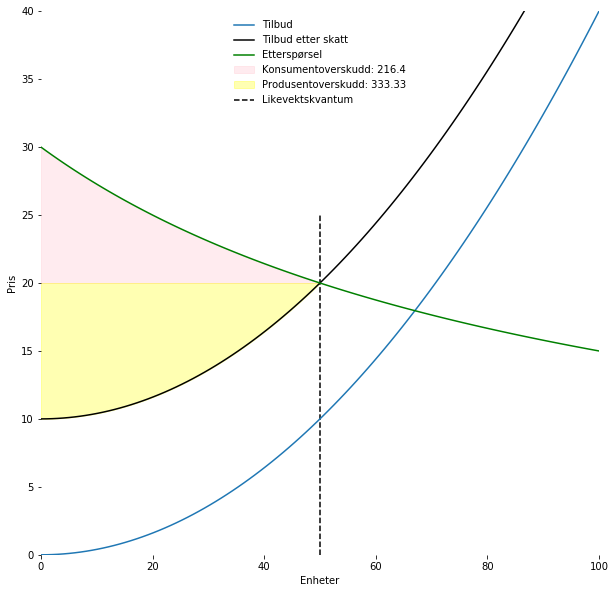

In [171]:
mkt=market()

taxes=list(range(-10,11))
for i in range(len(taxes)):
    tax=taxes[i]
    tbl=mkt.save_figure(tax,i)
    
create_html_file(taxes)



        



##### [< Forrige](11%20-%20interaktive%20websider.ipynb#Interaktivt-kart)    |     <span style="color:lightgrey">Neste></span>